In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
top50 = pd.read_csv('crossfitleaderboard_pg1.csv')
top50.columns = ['rank','first_name','last_name','country','age','height_cm','weight_kg','total_points','19.1_rank','19.1_result','19.2_rank','19.2_result','19.3_rank','19.3_result','19.4_rank','19.4_result','19.5_rank','19.5_result']
top50.head()

,rank,first_name,last_name,country,age,height_cm,weight_kg,total_points,19.1_rank,19.1_result,19.2_rank,19.2_result,19.3_rank,19.3_result,19.4_rank,19.4_result,19.5_rank,19.5_result
0,1,Mathew,Fraser,United States,29,170.18,88.450440,66,59,387 reps,3,16:28,1,7:27,2,8:08,1,6:53
1,2,Bjrgvin Karl,Gumundsson,Iceland,26,178.00,83.914520,93,5,399 reps,21,18:06,32,8:29,21,8:41,14,7:57
2,3,Jacob,Heppner,United States,29,172.72,87.089664,168,136,380 reps,20,18:04,3,7:38,5,8:23,4,7:21
3,4,Lefteris,Theofanidis,Greece,29,171.00,81.000000,183,51,388 reps,5,17:06,115,9:29,9,8:33,3,7:20
4,5,Jean-Simon,Roy-Lemaire,Canada,25,176.00,88.450440,187,5,399 reps,29,18:26,6,7:40,119,9:14,28,8:12


''

<Figure size 432x288 with 0 Axes>

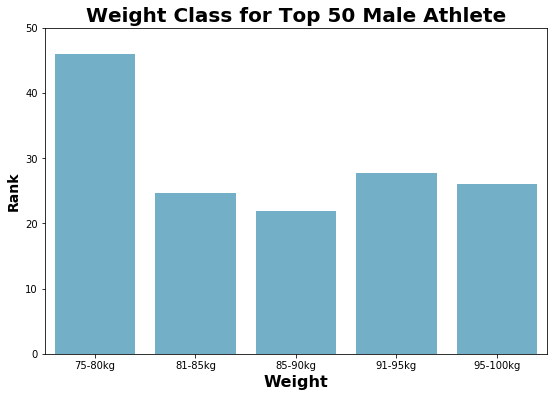

In [3]:
bins = [75,80,85,90,95,100]
labels = ['75-80kg','81-85kg','85-90kg','91-95kg','95-100kg']
top50['weight_class'] = pd.cut(top50['weight_kg'], bins, labels=labels)

#graph for weight by class
sns.despine()

plt.figure(figsize=(9,6))
xw = top50['weight_class']
yw = top50['rank']

sns.barplot(x=xw, y=yw, ci=None, color='#65B5D4')

plt.title('Weight Class for Top 50 Male Athlete', fontsize=20, fontweight='bold')
plt.xlabel('Weight', fontsize=16, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

#plt.savefig('weight_by_class_top50.svg')

#ticks_x = np.linspace(0, 12, 13)
#values_x = [' ','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#plt.xticks(ticks_x, values_x)
;

([<matplotlib.axis.YTick at 0x1a1da18048>,
 <a list of 6 Text yticklabel objects>)

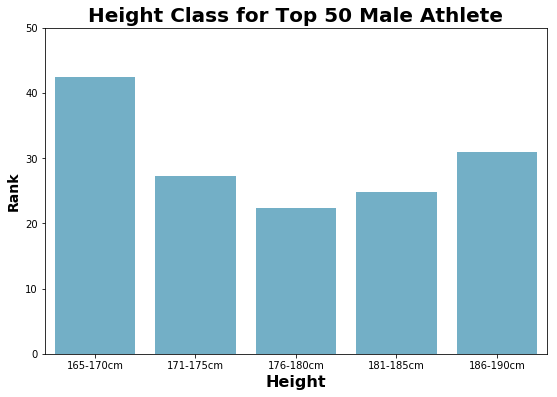

In [4]:
bins_h = [165,170,175,180,185,190]
labels_h = ['165-170cm','171-175cm','176-180cm','181-185cm','186-190cm']
top50['height_class'] = pd.cut(top50['height_cm'], bins_h, labels=labels_h)

plt.figure(figsize=(9,6))
xh = top50['height_class']
yh = top50['rank']

sns.barplot(x=xh, y=yh,ci=None, color='#65B5D4')

plt.title('Height Class for Top 50 Male Athlete', fontsize=20, fontweight='bold')
plt.xlabel('Height', fontsize=16, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

#plt.savefig('height_by_class_top50.svg')


In [5]:
height_m = top50['height_cm'].div(100)
top50['bmi'] = top50['weight_kg'].div(np.square(height_m)).round(1)
top50.head()
#top50['bmi'] = top50['weight_kg] / np.square(top50['height_m'])

,rank,first_name,last_name,country,age,height_cm,weight_kg,total_points,19.1_rank,19.1_result,...,19.2_result,19.3_rank,19.3_result,19.4_rank,19.4_result,19.5_rank,19.5_result,weight_class,height_class,bmi
0,1,Mathew,Fraser,United States,29,170.18,88.450440,66,59,387 reps,...,16:28,1,7:27,2,8:08,1,6:53,85-90kg,171-175cm,30.5
1,2,Bjrgvin Karl,Gumundsson,Iceland,26,178.00,83.914520,93,5,399 reps,...,18:06,32,8:29,21,8:41,14,7:57,81-85kg,176-180cm,26.5
2,3,Jacob,Heppner,United States,29,172.72,87.089664,168,136,380 reps,...,18:04,3,7:38,5,8:23,4,7:21,85-90kg,171-175cm,29.2
3,4,Lefteris,Theofanidis,Greece,29,171.00,81.000000,183,51,388 reps,...,17:06,115,9:29,9,8:33,3,7:20,81-85kg,171-175cm,27.7
4,5,Jean-Simon,Roy-Lemaire,Canada,25,176.00,88.450440,187,5,399 reps,...,18:26,6,7:40,119,9:14,28,8:12,85-90kg,176-180cm,28.6


''

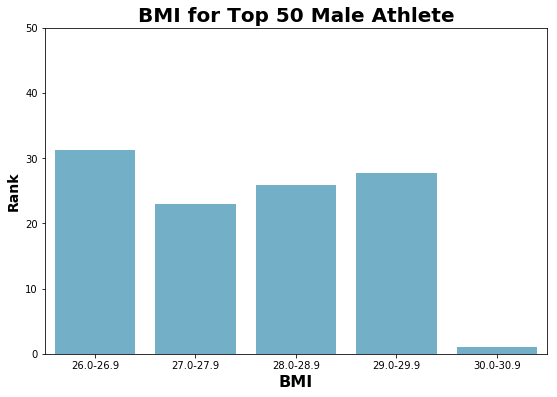

In [6]:
bins_b = [26,27,28,29,30,31]
labels_b = ['26.0-26.9','27.0-27.9','28.0-28.9','29.0-29.9','30.0-30.9']
top50['bmi_class'] = pd.cut(top50['bmi'], bins_b, labels=labels_b)

plt.figure(figsize=(9,6))
xb = top50['bmi_class']
yb = top50['rank']

sns.barplot(x=xb, y=yb,ci=None, color='#65B5D4')

plt.title('BMI for Top 50 Male Athlete', fontsize=20, fontweight='bold')
plt.xlabel('BMI', fontsize=16, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

#plt.savefig('bmi_by_class_top50.svg')
;


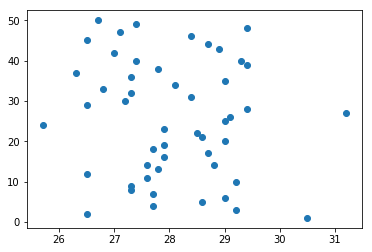

In [7]:
xb = top50['bmi']
yb = top50['rank']

plt.scatter(xb,yb)

''

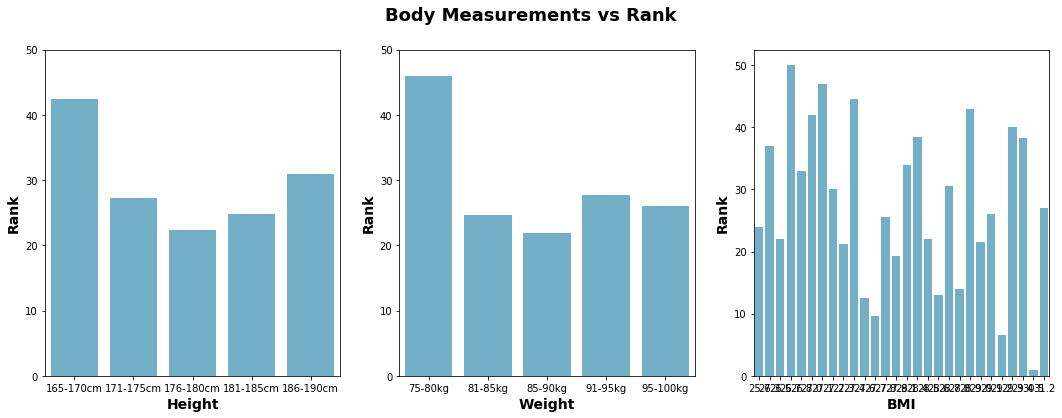

In [8]:
plt.figure(figsize=(18,6))
sns.despine()
plt.suptitle('Body Measurements vs Rank',fontsize = 18, fontweight='bold')

#weight
plt.subplot(1,3,1)

sns.barplot(x=xh, y=yh,ci=None, color='#65B5D4')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

plt.xlabel('Height', fontsize=14, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')

#height
plt.subplot(1,3,2)

sns.barplot(x=xw, y=yw, ci=None, color='#65B5D4')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

plt.xlabel('Weight', fontsize=14, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')

#bmi
plt.subplot(1,3,3)
sns.barplot(x=xb, y=yb,ci=None, color='#65B5D4')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

plt.xlabel('BMI', fontsize=14, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')

plt.savefig('bodymeasurements_by_class_top50.svg')
;

''

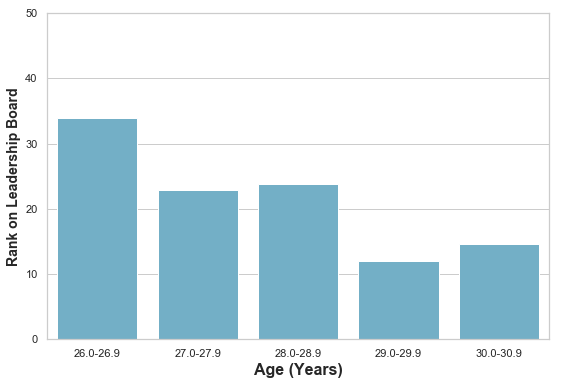

In [9]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")
sns.despine()
bins_a = [26,27,28,29,30,31]
labels_a = ['26.0-26.9','27.0-27.9','28.0-28.9','29.0-29.9','30.0-30.9']
top50['age'] = pd.cut(top50['age'], bins_a, labels=labels_a)

#plt.figure(figsize=(9,6))
xb = top50['age']
yb = top50['rank']

sns.barplot(x=xb, y=yb,ci=None, color='#65B5D4')

#plt.title('Age of the Top 50 Male Athlete', fontsize=20, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=16, fontweight='bold')
plt.ylabel('Rank on Leadership Board', fontsize=14, fontweight='bold')

ticks_y = np.linspace(0, 50, 6)
values_y = ['0','10', '20','30','40','50']
plt.yticks(ticks_y, values_y)

plt.savefig('age_class_top50.svg')
;


In [10]:
top50 = pd.read_csv('crossfitleaderboard_pg1.csv')
top50.columns = ['rank','first_name','last_name','country','age','height_cm','weight_kg','total_points','19.1_rank','19.1_result','19.2_rank','19.2_result','19.3_rank','19.3_result','19.4_rank','19.4_result','19.5_rank','19.5_result']
top50.head()

,rank,first_name,last_name,country,age,height_cm,weight_kg,total_points,19.1_rank,19.1_result,19.2_rank,19.2_result,19.3_rank,19.3_result,19.4_rank,19.4_result,19.5_rank,19.5_result
0,1,Mathew,Fraser,United States,29,170.18,88.450440,66,59,387 reps,3,16:28,1,7:27,2,8:08,1,6:53
1,2,Bjrgvin Karl,Gumundsson,Iceland,26,178.00,83.914520,93,5,399 reps,21,18:06,32,8:29,21,8:41,14,7:57
2,3,Jacob,Heppner,United States,29,172.72,87.089664,168,136,380 reps,20,18:04,3,7:38,5,8:23,4,7:21
3,4,Lefteris,Theofanidis,Greece,29,171.00,81.000000,183,51,388 reps,5,17:06,115,9:29,9,8:33,3,7:20
4,5,Jean-Simon,Roy-Lemaire,Canada,25,176.00,88.450440,187,5,399 reps,29,18:26,6,7:40,119,9:14,28,8:12


## Age vs Rank Hex Map

In [11]:
male_df = pd.read_csv('crossfitleaderboard_pg1-100.csv')
male_df.head()

,Rank,First Name,Last Name,Country,Age,Height(cm),Weight(kg),Points,19.1 Rank,19.1 Result,19.2 Rank,19.2 Result,19.3 Rank,19.3 Result,19.4 Rank,19.4 Result,19.5 Rank,19.5 Result
0,1,Mathew,Fraser,United States,29,170.18,88.450440,66,59,387 reps,3,16:28,1,7:27,2,8:08,1,6:53
1,2,Bjrgvin Karl,Gumundsson,Iceland,26,178.00,83.914520,93,5,399 reps,21,18:06,32,8:29,21,8:41,14,7:57
2,3,Jacob,Heppner,United States,29,172.72,87.089664,168,136,380 reps,20,18:04,3,7:38,5,8:23,4,7:21
3,4,Lefteris,Theofanidis,Greece,29,171.00,81.000000,183,51,388 reps,5,17:06,115,9:29,9,8:33,3,7:20
4,5,Jean-Simon,Roy-Lemaire,Canada,25,176.00,88.450440,187,5,399 reps,29,18:26,6,7:40,119,9:14,28,8:12


/Users/kelseyheng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


''

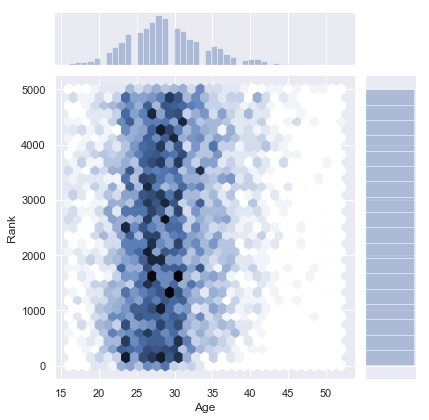

In [13]:
#graph for athlete rank 1-5000
sns.set(rc={'figure.figsize':(15,7)})
sns.jointplot("Age", "Rank", data=male_df, kind="hex")

#plt.savefig('hex_top5000.svg')
;

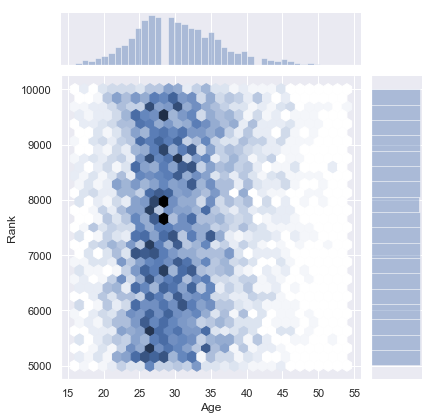

In [14]:
#graph for athlete rank 5001-10000
male_df = pd.read_csv('crossfitleaderboard_pg101-200.csv')
male_df.head()
sns.set(rc={'figure.figsize':(15,7)})
sns.jointplot("Age", "Rank", data=male_df, kind="hex")

plt.savefig('hex_top5000-10000.svg')

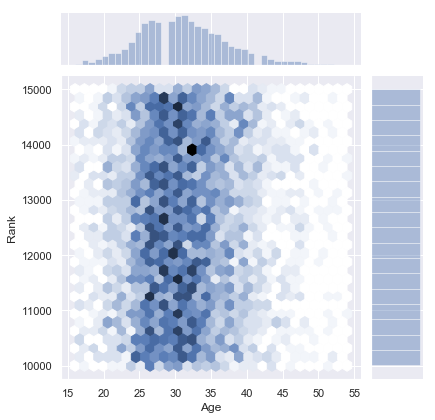

In [15]:
#graph for athlete rank 10001-15000
male_df = pd.read_csv('crossfitleaderboard_pg201-300.csv')
male_df.head()
sns.set(rc={'figure.figsize':(15,7)})
sns.jointplot("Age", "Rank", data=male_df, kind="hex")

plt.savefig('hex_top5000-10000.svg')

### Correlation - Individual events to Age

In [16]:
male_df = pd.read_csv('merged_ranks.csv')
male_df.head()

,rank,age,height_cm,weight_kg,bmi,total_points,191_rank,192_rank,193_rank,194_rank,195_rank,Australia,Brazil,Canada,Denmark,Iceland,Russian Federation,Switzerland,United Kingdom,United States
0,10001,36,178.0,83.0,26.2,76555,14443,14821,23679,10964,12648,0,0,0,0,0,0,0,0,0
1,10002,28,179.0,84.0,26.2,76562,9881,16712,25132,9634,15203,0,0,0,0,0,0,0,0,0
2,10003,37,168.0,77.0,27.3,76568,36340,11370,14678,3260,10920,0,0,0,0,0,0,0,0,1
3,10004,26,183.0,91.0,27.2,76570,8828,12089,18389,19076,18188,0,0,0,0,0,0,0,0,1
4,10005,26,178.0,85.0,26.8,76573,14443,20846,10881,16303,14100,1,0,0,0,0,0,0,0,0


In [17]:
y = male_df['age']
x = [male_df['191_rank'],male_df['192_rank'],male_df['193_rank'],male_df['194_rank'],male_df['195_rank']]
np.corrcoef(x, y)

array([[1.        , 0.43623506, 0.1413565 , 0.24689837, 0.36161794,
        0.14603434],
       [0.43623506, 1.        , 0.39593118, 0.55961975, 0.58193386,
        0.14097893],
       [0.1413565 , 0.39593118, 1.        , 0.48175675, 0.39371015,
        0.12375259],
       [0.24689837, 0.55961975, 0.48175675, 1.        , 0.54816021,
        0.19925396],
       [0.36161794, 0.58193386, 0.39371015, 0.54816021, 1.        ,
        0.09033067],
       [0.14603434, 0.14097893, 0.12375259, 0.19925396, 0.09033067,
        1.        ]])

''

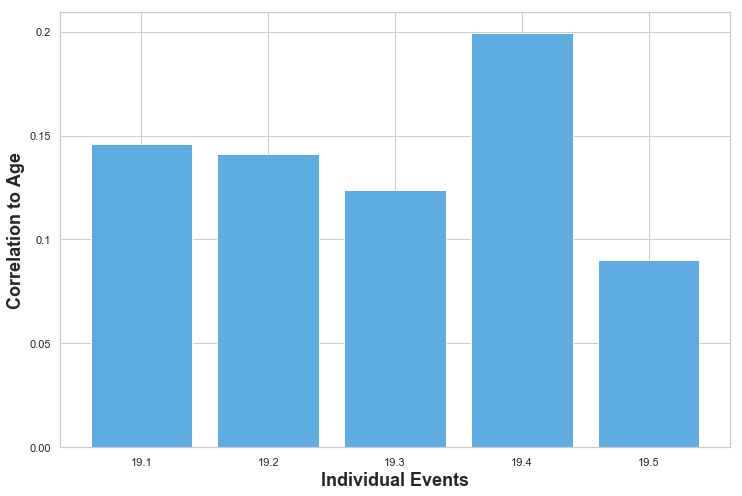

In [24]:

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
y = (0.14603434, 0.14097893, 0.12375259, 0.19925396, 0.09033067)
x = (1 ,2, 3,4 ,5)
plt.bar(x,y, color='#5DADE2')

#plt.title('Monthly Traffic - Top 5 Stations', fontsize=20, fontweight='bold')
plt.xlabel('Individual Events', fontsize=18, fontweight='bold')
plt.ylabel('Correlation to Age', fontsize=18, fontweight='bold')

ticks_x = np.linspace(1, 5, 5)
values_x = ['19.1','19.2','19.3','19.4','19.5']
plt.xticks(ticks_x, values_x)

ticks_y = np.linspace(0, 0.2, 5)
values_y = ['0.00','0.05','0.1','0.15',0.2]
plt.yticks(ticks_y, values_y)

plt.savefig('correlation_age_events.svg')
;